In [12]:
from __future__ import division
import random
import math
import matplotlib.pyplot as plt
import numpy as np

fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [12,10]

In [13]:
# Parametros:
pi = math.pi
error = 0.001
tolerance = 10

# LCG seed
seed = 1994

# Halton bases
b1 = 2
b2 = 3

In [14]:
random.random()

0.9624998271881797

In [15]:
def halton_aux(index, base):
    f = 1
    r = 0
    while index > 0:
        f = f / base
        r = r + f * (index % base)
        index = math.floor(index / base)
    return r

In [16]:
def halton(base):
    i = 1
    while True:
        r = halton_aux(i, base)
        i += 1
        yield r

In [17]:
h1 = halton(b1)
h2 = halton(b2)

In [18]:
def lcg(seed): 
    a = 6364136223846793005
    c = 1442695040888963407
    m = 2**64
    while True:
        seed = (a * seed + c) % m
        yield seed / m

lcg = lcg(seed)

In [19]:
def default_mc(error, tolerance):
    inside = 0
    total = 0
    marker = 0
    approx_pi = 0
    while tolerance > 0:
        if abs(approx_pi - pi) < error:
            if marker == 0 or marker == total:
                marker = total + 1
                tolerance -= 1
            else:
                tolerance = tolerance
                marker = 0
        total += 1
        x = random.random()
        y = random.random()
        x = x**2
        y = y**2
        if math.sqrt(x + y) < 1.0:
            inside += 1
        approx_pi = (inside / total) * 4
    return approx_pi, total - 10

In [20]:
default_mc(error, tolerance)

(3.142857142857143, 1544)

In [21]:
def lcg_mc(error, tolerance):
    inside = 0
    total = 0
    marker = 0
    approx_pi = 0
    while tolerance > 0:
        if abs(approx_pi - pi) < error:
            if marker == 0 or marker == total:
                marker = total + 1
                tolerance -= 1
            else:
                tolerance = tolerance
                marker = 0
        total += 1
        x = next(lcg)
        y = next(lcg)
        x = x**2
        y = y**2
        if math.sqrt(x + y) < 1.0:
            inside += 1
        approx_pi = (inside / total) * 4
    return approx_pi, total - 10

In [22]:
lcg_mc(error, tolerance)

(3.1425470725487004, 36848)

In [23]:
def halton_mc(error, tolerance):
    inside = 0
    total = 0
    marker = 0
    approx_pi = 0
    while tolerance > 0:
        if abs(approx_pi - pi) < error:
            if marker == 0 or marker == total:
                marker = total + 1
                tolerance -= 1
            else:
                tolerance = tolerance
                marker = 0
        total += 1
        x = next(h1)
        y = next(h2)
        x = x**2
        y = y**2
        if math.sqrt(x + y) < 1.0:
            inside += 1
        approx_pi = (inside / total) * 4
    return approx_pi, total - 10

In [24]:
halton_mc(error, tolerance)

(3.141500474833808, 1043)

In [25]:
trials = range(1000)
default_steps = []
lcg_steps = []
halton_steps = []

for i in trials:
    pi_approx, steps = default_mc(error, tolerance)
    default_steps.append(steps)
    pi_approx, steps = lcg_mc(error, tolerance)
    lcg_steps.append(steps)
    pi_approx, steps = halton_mc(error, tolerance)
    halton_steps.append(steps)

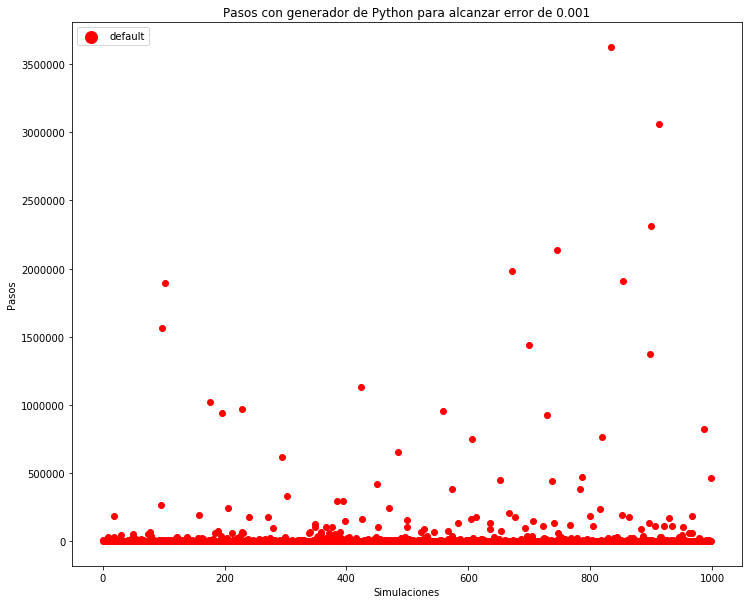

In [26]:
plt.figure()
plt.scatter(trials, default_steps, marker='o', label='default', c='r')
# Plot legend.
plt.legend(loc="upper left", markerscale=2., scatterpoints=1, fontsize=10)
plt.title('Pasos con generador de Python para alcanzar error de ' + str(error))
plt.xlabel('Simulaciones')
plt.ylabel('Pasos')
plt.show()

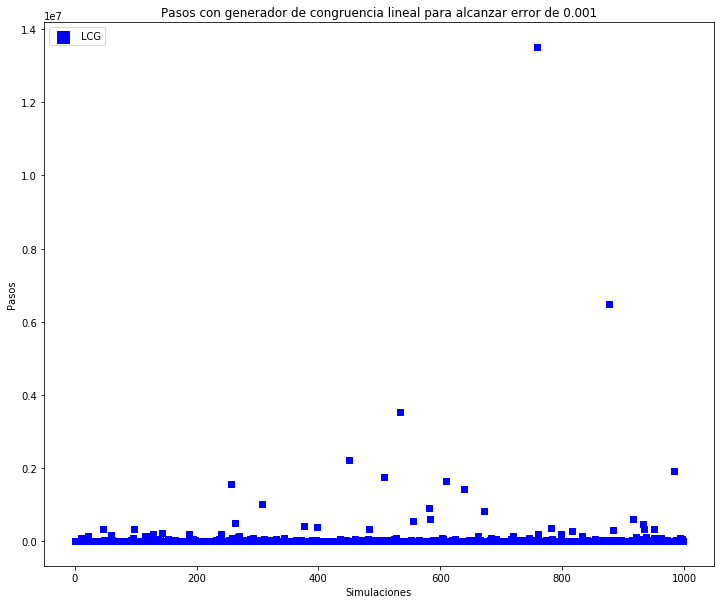

In [27]:
plt.figure()
plt.scatter(trials, lcg_steps, marker='s', label='LCG', c='b')
# Plot legend.
plt.legend(loc="upper left", markerscale=2., scatterpoints=1, fontsize=10)
plt.title('Pasos con generador de congruencia lineal para alcanzar error de ' + str(error))
plt.xlabel('Simulaciones')
plt.ylabel('Pasos')
plt.show()

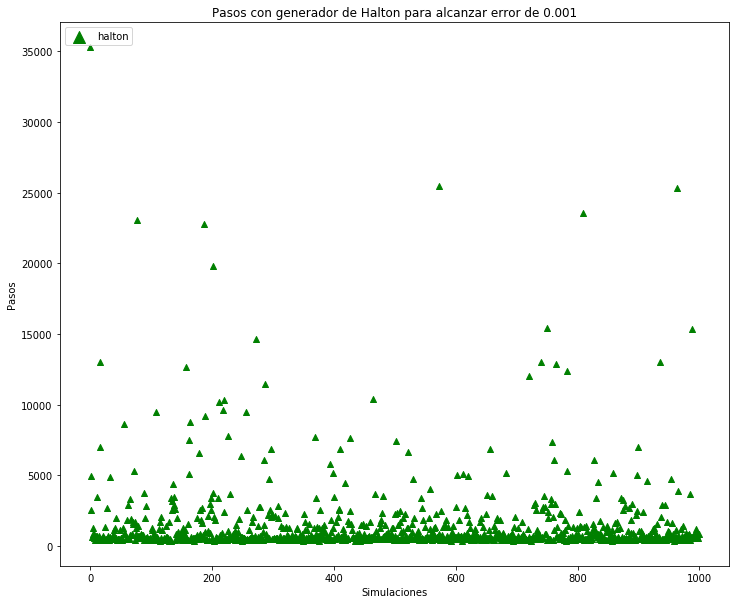

In [28]:
plt.figure()
plt.scatter(trials, halton_steps, marker='^', label='halton', c='g')
# Plot legend.
plt.legend(loc="upper left", markerscale=2., scatterpoints=1, fontsize=10)
plt.title('Pasos con generador de Halton para alcanzar error de ' + str(error))
plt.xlabel('Simulaciones')
plt.ylabel('Pasos')
plt.show()

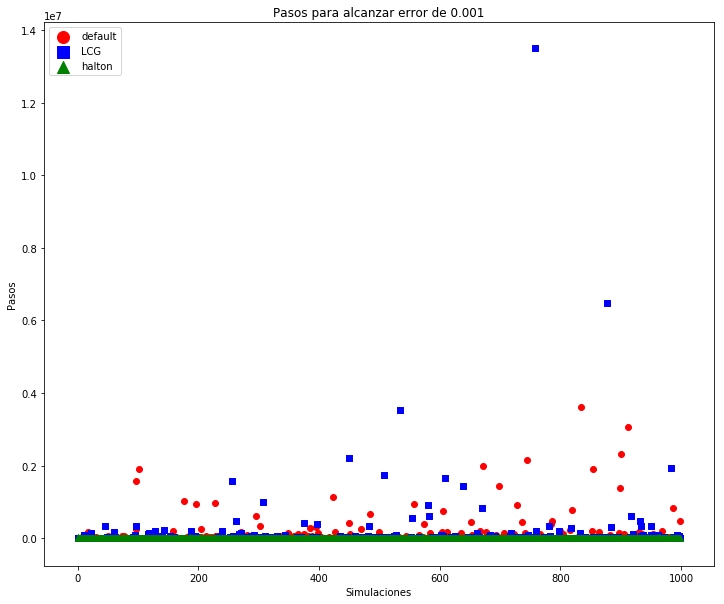

In [29]:
plt.figure()
plt.scatter(trials, default_steps, marker='o', label='default', c='r')
plt.scatter(trials, lcg_steps, marker='s', label='LCG', c='b')
plt.scatter(trials, halton_steps, marker='^', label='halton', c='g')
# Plot legend.
plt.legend(loc="upper left", markerscale=2., scatterpoints=1, fontsize=10)
plt.title('Pasos para alcanzar error de ' + str(error))
plt.xlabel('Simulaciones')
plt.ylabel('Pasos')
plt.show()

In [30]:
print('Media de pasos con generador de Python:')
print(np.mean(default_steps))
print('Media de pasos con generador de congruencia lineal:')
print(np.mean(lcg_steps))
print('Media de pasos con generador de Halton:')
print(np.mean(halton_steps))

Media de pasos con generador de Python:
46550.782
Media de pasos con generador de congruencia lineal:
52164.091
Media de pasos con generador de Halton:
1516.099


In [31]:
print('Desviacion estandar de pasos con generador de Python:')
print(np.std(default_steps))
print('Desviacion estandar de pasos con generador de congruencia lineal:')
print(np.std(lcg_steps))
print('Desviacion estandar de pasos con generador de Halton:')
print(np.std(halton_steps))

Desviacion estandar de pasos con generador de Python:
243234.24023012977
Desviacion estandar de pasos con generador de congruencia lineal:
509167.2441865194
Desviacion estandar de pasos con generador de Halton:
2770.653303681101


In [35]:
trials = range(100)
errors = [1 / (10**i) for i in range(1, 5)]
default_steps = []
lcg_steps = []
halton_steps = []
default_means = []
lcg_means = []
halton_means = []

for error in errors:
    for i in trials: 
        pi_approx, steps = default_mc(error, tolerance)
        default_steps.append(steps)
        pi_approx, steps = lcg_mc(error, tolerance)
        lcg_steps.append(steps)
        pi_approx, steps = halton_mc(error, tolerance)
        halton_steps.append(steps)
    default_means.append(np.mean(default_steps))
    lcg_means.append(np.mean(lcg_steps))
    halton_means.append(np.mean(halton_steps))

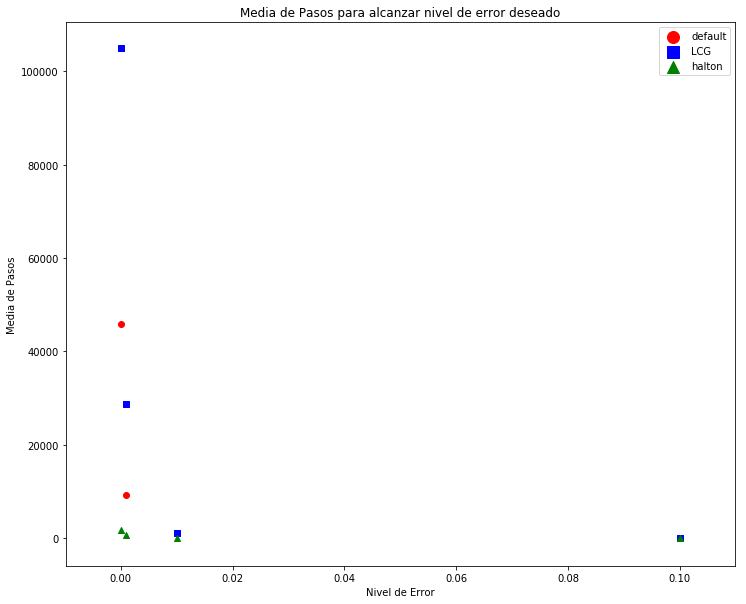

In [45]:
plt.figure()
plt.scatter(errors, default_means, marker='o', label='default', c='r')
plt.scatter(errors, lcg_means, marker='s', label='LCG', c='b')
plt.scatter(errors, halton_means, marker='^', label='halton', c='g')
# Plot legend.
plt.legend(loc="upper right", markerscale=2., scatterpoints=1, fontsize=10)
plt.title('Media de Pasos para alcanzar nivel de error deseado')
plt.xlabel('Nivel de Error')
plt.ylabel('Media de Pasos')
plt.show()